# Open FLUKA air scattering beam size

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 12
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

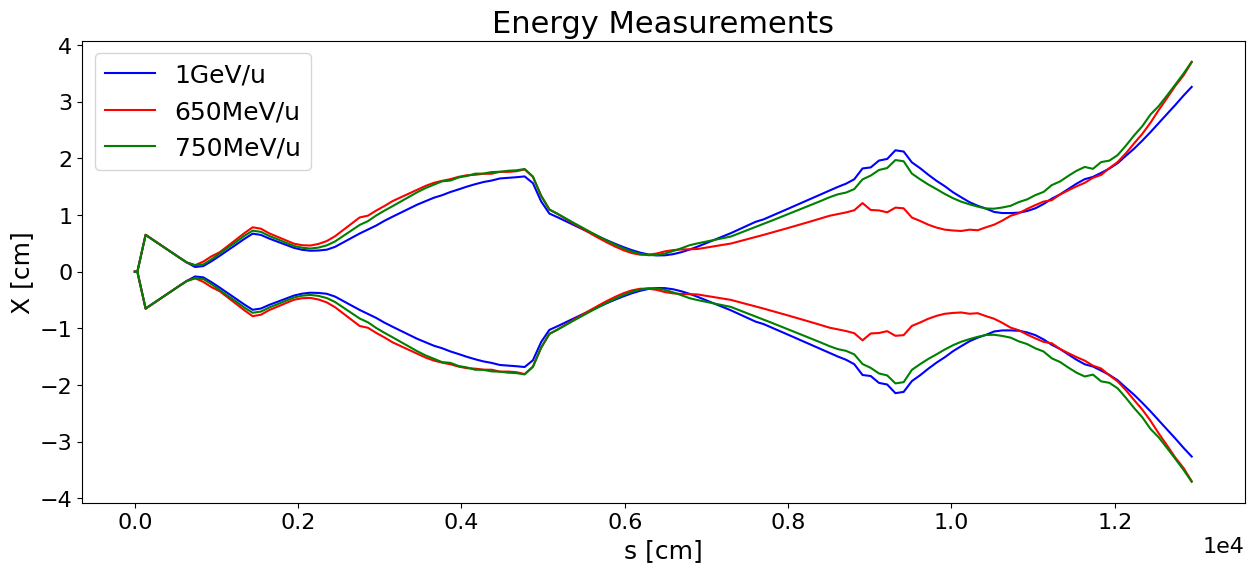

In [2]:
# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat']

# list of colors and labels for each dataset
colors = ["b", "r", "g"]
labels = ["1GeV/u", "650MeV/u", "750MeV/u"]

fig, ax = plt.subplots(figsize=(15,6))

for file_path, color, label in zip(file_paths, colors, labels):
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)

    # plot the data
    ax.plot(data.S, data.s2X, c=color, label=label, )
    ax.plot(data.S, -data.s2X, c=color)

# configure the plot
ax.set_xlabel("s [cm]")
ax.set_ylabel("X [cm]")
ax.set_title("Energy Measurements", fontsize=22)
ax.legend()

plt.show()


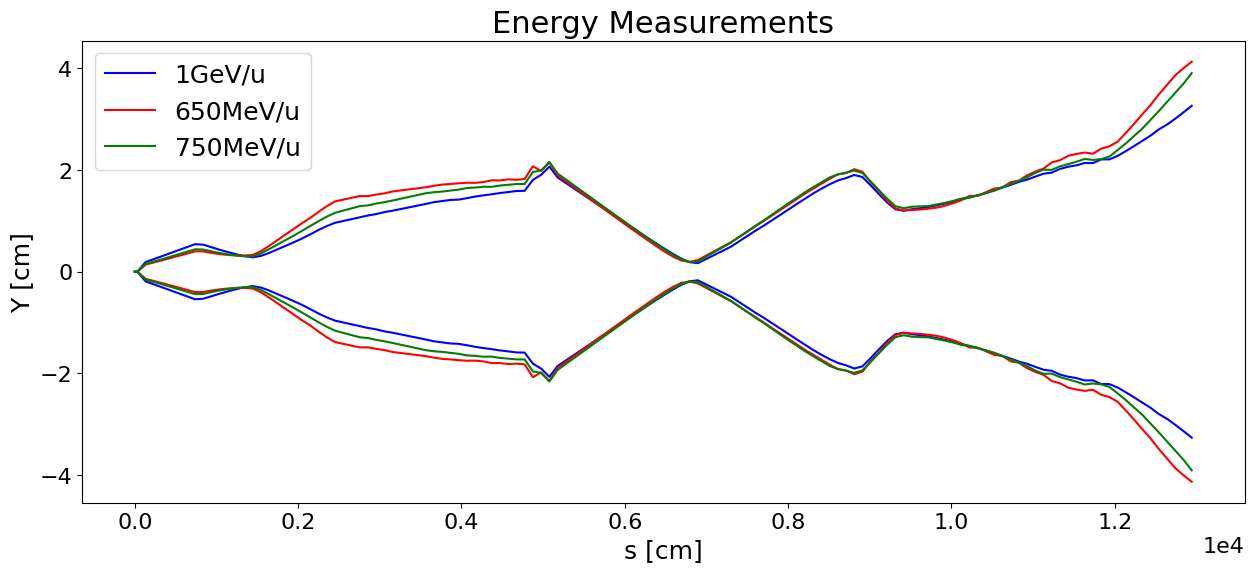

In [3]:
# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat']

# list of colors and labels for each dataset
colors = ["b", "r", "g"]
labels = ["1GeV/u", "650MeV/u", "750MeV/u"]

fig, ax = plt.subplots(figsize=(15,6))

for file_path, color, label in zip(file_paths, colors, labels):
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)

    if "1GeV" in file_path:
        ref = data.muX
    
    # plot the data
    ax.plot(data.S, data.s2Y, c=color, label=label, )
    ax.plot(data.S, -data.s2Y, c=color)

# configure the plot
ax.set_xlabel("s [cm]")
ax.set_ylabel("Y [cm]")
ax.set_title("Energy Measurements", fontsize=22)
ax.legend()

plt.show()


# Centroid displacement

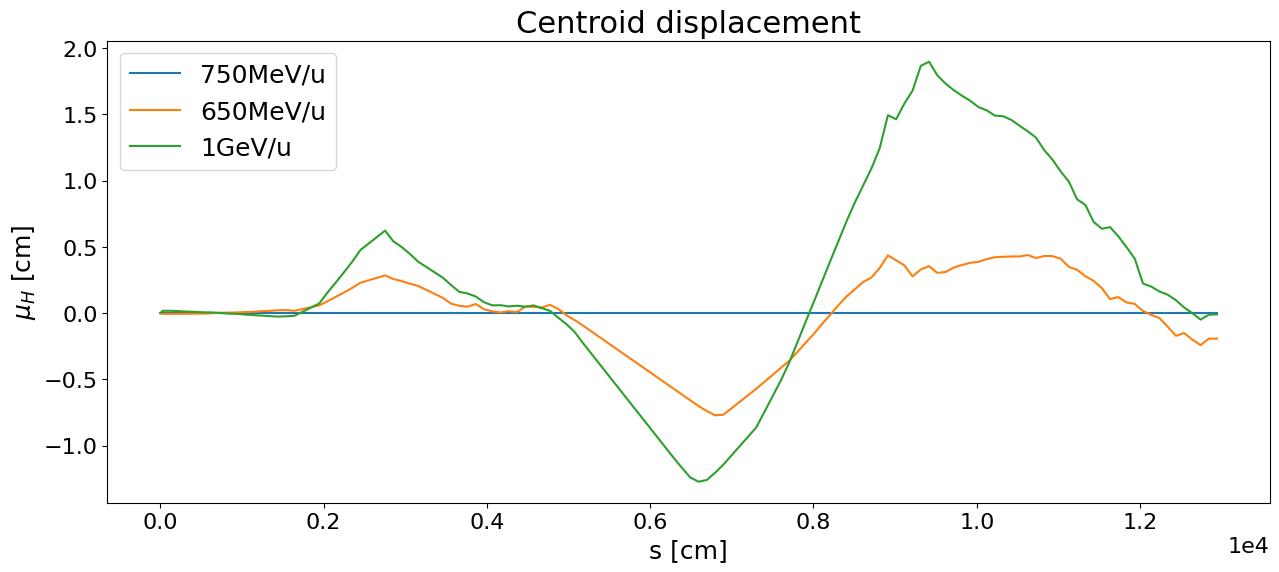

In [4]:
# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat',
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat',]

# list of colors and labels for each dataset
colors = ["b", "r", "g"]
labels = ["750MeV/u", "650MeV/u", "1GeV/u"]

fig, ax = plt.subplots(figsize=(15,6))

for file_path, color, label in zip(file_paths, colors, labels):
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)

    if "1GeV" in file_path:
        ref = data.muX
    
    # plot the data
    ax.plot(data.S, data.muX-ref, label=label,)

# configure the plot
ax.set_xlabel("s [cm]")
ax.set_ylabel("$\mu_{H}$ [cm]")
ax.set_title("Centroid displacement", fontsize=22)
ax.legend()

plt.show()


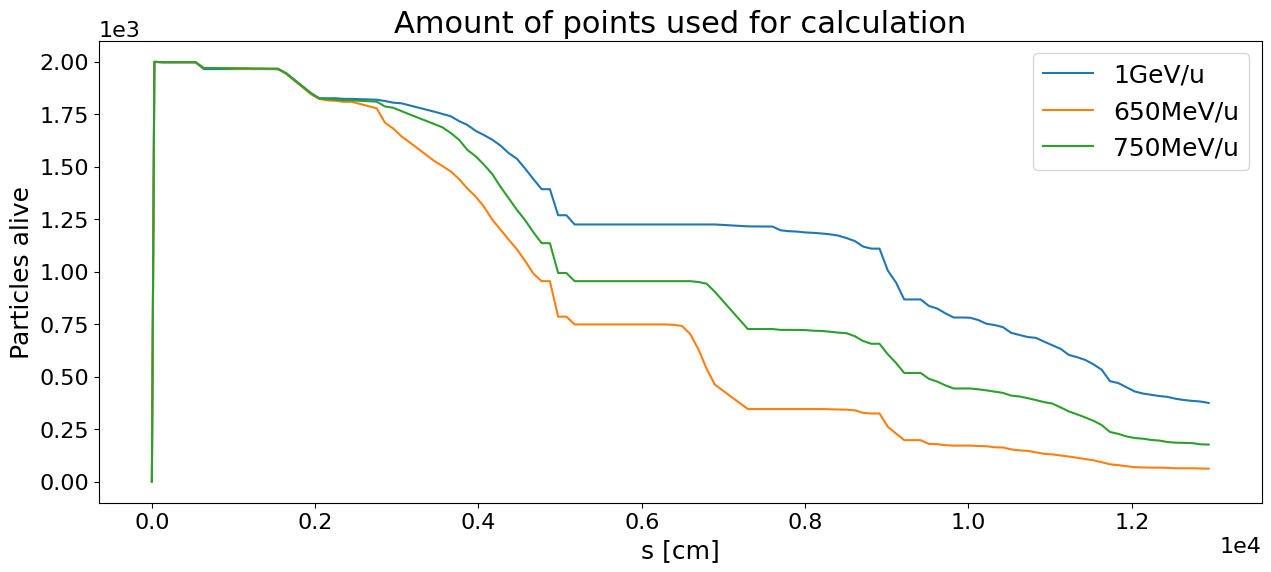

In [5]:
# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat']

# list of colors and labels for each dataset
colors = ["b", "r", "g"]
labels = ["1GeV/u", "650MeV/u", "750MeV/u"]

fig, ax = plt.subplots(figsize=(15,6))

for file_path, color, label in zip(file_paths, colors, labels):
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)
    
    ax.plot(data.S, data.points, label=label,)

# configure the plot
ax.set_xlabel("s [cm]")
ax.set_ylabel("Particles alive")
ax.set_title("Amount of points used for calculation", fontsize=22)
ax.legend()

plt.show()


In [6]:
from cpymad.madx import Madx
import requests
import numpy as np

T = 23.08 # GeV kinetic energy
# T = 4.54 # GeV kinetic energy ion equivalent of 750 MeV/u
E0 = 0.938 # GeV/c^2 proton rest mass
E = T + E0 # total energy
gamma = E / E0 # gamma
beta = np.sqrt(1-gamma**(-2))
p = E*beta # GeV/c beam momentum

print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p,3)} GeV/c")

# Matched initial parameters
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn =  3.534081877201574e-06
sige = 0.000679081344780741

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

sequence = "f61t8_op"
madx.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

gamma = 25.606
beta = 0.999
p = 24.0 GeV/c


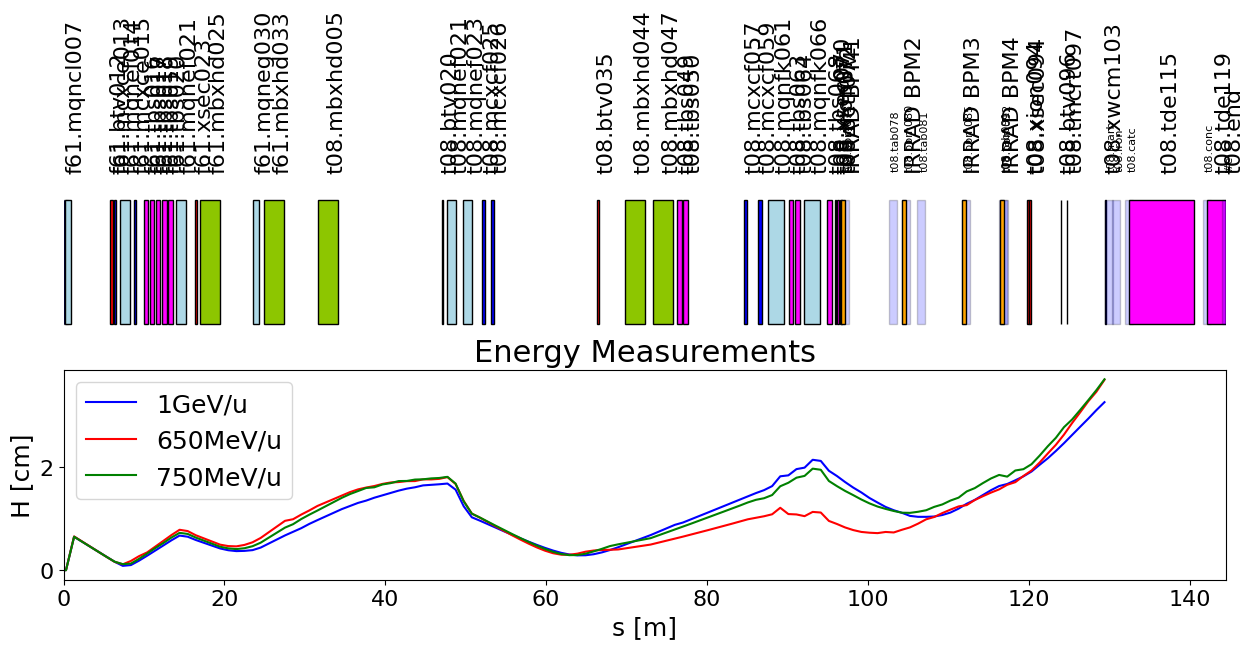

In [7]:
from madxtools.plot_tool import *
fig, ax = plt.subplots(2,1, figsize=(15,6), sharex=True)
draw_synoptic(ax[0], twiss)

# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat']

# list of colors and labels for each dataset
colors = ["b", "r", "g"]
labels = ["1GeV/u", "650MeV/u", "750MeV/u"]


for file_path, color, label in zip(file_paths, colors, labels):
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)

    # plot the data
    ax[1].plot(data.S/100, data.s2X, c=color, label=label, )
    # ax[1].plot(data.S, -data.s2X, c=color)

# configure the plot
ax[1].set_xlabel("s [m]")
ax[1].set_ylabel("H [cm]")
ax[1].set_title("Energy Measurements", fontsize=22)
ax[1].legend()

plt.show()


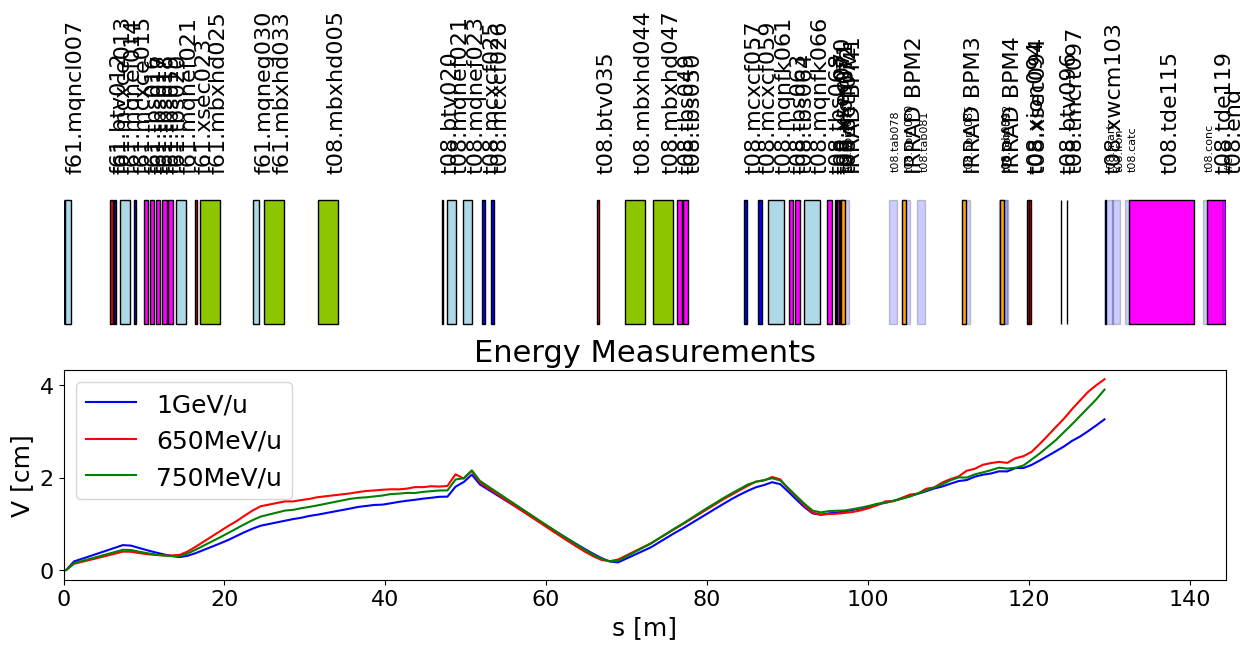

In [8]:
from madxtools.plot_tool import *
fig, ax = plt.subplots(2,1, figsize=(15,6), sharex=True)
draw_synoptic(ax[0], twiss)

# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat']

# list of colors and labels for each dataset
colors = ["b", "r", "g"]
labels = ["1GeV/u", "650MeV/u", "750MeV/u"]


for file_path, color, label in zip(file_paths, colors, labels):
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)

    # plot the data
    ax[1].plot(data.S/100, data.s2Y, c=color, label=label, )

# configure the plot
ax[1].set_xlabel("s [m]")
ax[1].set_ylabel("V [cm]")
ax[1].set_title("Energy Measurements", fontsize=22)
ax[1].legend()

plt.show()


### Centroid + beam size

In [9]:
import pandas as pd

# specify the file paths
file_paths = ['FLUKA data/1GeV_dpp_TRAJ_processed.dat', 
              'FLUKA data/750MeV_dpp_TRAJ_processed.dat',
              'FLUKA data/650MeV_dpp_TRAJ_processed.dat',]

dataframes = []  # List to store individual dataframes

for file_path in file_paths:
    # read the file
    data = pd.read_csv(file_path)

    # sort the data
    data.sort_values(by="S", inplace=True)
    
    # extract energy from file name
    energy = file_path.split('/')[1].split('_')[0]
    # convert energy to GeV
    if 'MeV' in energy:
        energy = round(float(energy.replace('MeV', ''))/1000, 2)  # convert MeV to GeV
    else:
        energy = float(energy.replace('GeV', ''))
    # create new column
    data['energy_GeV'] = energy

    dataframes.append(data)

# Concatenate all dataframes into one large dataframe
df = pd.concat(dataframes)


# Renaming columns
df.rename(columns={
    'Unnamed: 0': 'index', 
    'S': 's', 
    'points': 'particles_alive',
    'muX': 'mean_H', 
    's2X': 'std_H', 
    'muY': 'mean_V', 
    's2Y': 'std_V',
    'muP': 'momentum', 
    's2P': 'momentum_std',
}, inplace=True)

# Converting cm to m for 's', 'mean_H', 'std_H', 'mean_V', 'std_V' columns
df['s'] = df['s'] / 100
df['mean_H'] = df['mean_H'] / 100
df['std_H'] = df['std_H'] / 100
df['mean_V'] = df['mean_V'] / 100
df['std_V'] = df['std_V'] / 100


In [10]:
df.keys()

Index(['index', 's', 'particles_alive', 'mean_H', 'std_H', 'mean_V', 'std_V',
       'momentum', 'momentum_std', 'energy_GeV'],
      dtype='object')

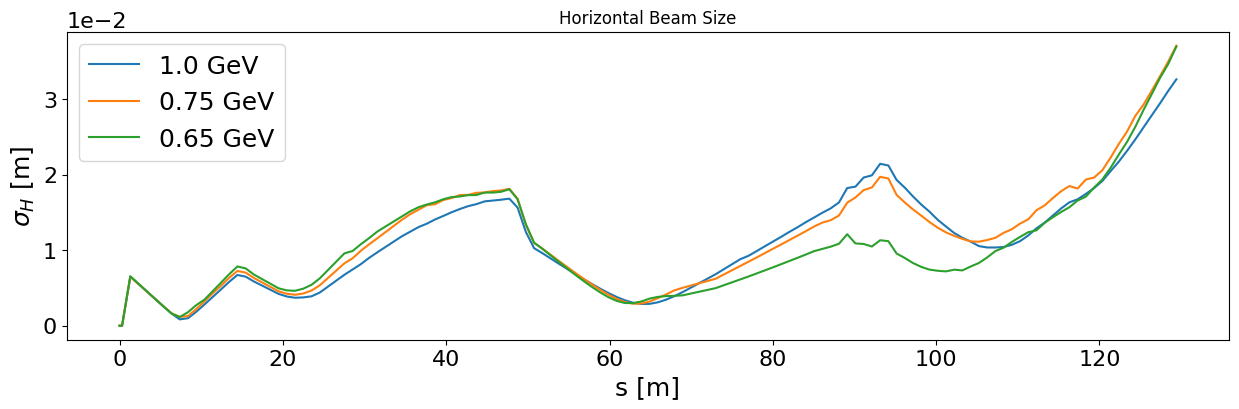

In [11]:
fig, ax = plt.subplots(figsize=(15,4))

for energy in df.energy_GeV.unique():

    df_sub = df[df.energy_GeV == energy]
    ax.plot(df_sub.s, df_sub.std_H, label=f'{energy} GeV')

ax.set_xlabel('s [m]')
ax.set_ylabel('$\sigma_{H}$ [m]')
ax.set_title('Horizontal Beam Size')
ax.legend()


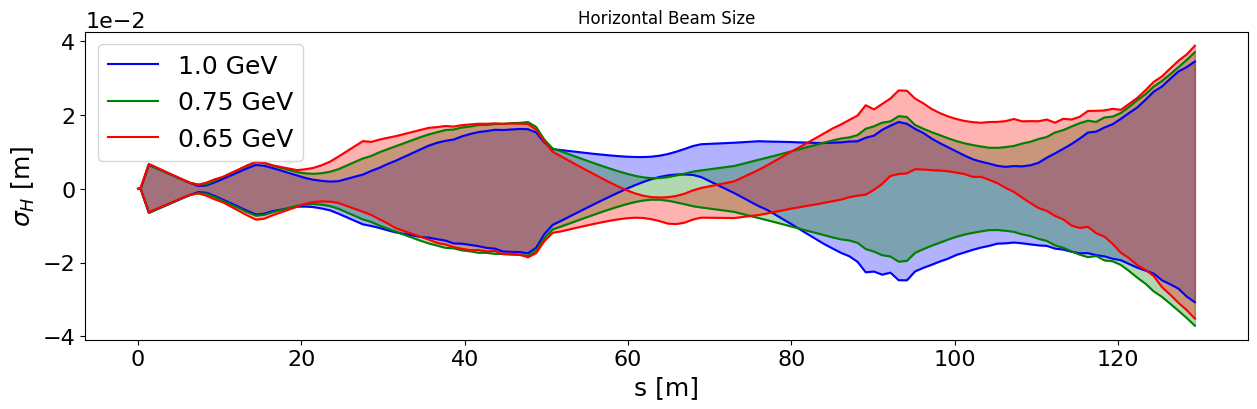

In [12]:
fig, ax = plt.subplots(figsize=(15,4))

colors = ['b', 'g', 'r']  # Define a list of colors

ref = df[df.energy_GeV == 0.75].mean_H  # Reference beam size

for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]
    ax.plot(df_sub.s, df_sub.mean_H - ref + df_sub.std_H, color=color, label=f'{energy} GeV')
    ax.plot(df_sub.s, df_sub.mean_H - ref - df_sub.std_H, color=color)

    # Fill the space between the standard deviation lines
    ax.fill_between(df_sub.s, df_sub.mean_H - ref - df_sub.std_H, df_sub.mean_H - ref + df_sub.std_H, color=color, alpha=0.3)

ax.set_xlabel('s [m]')
ax.set_ylabel('$\sigma_{H}$ [m]')
ax.set_title('Horizontal Beam Size')
ax.legend()


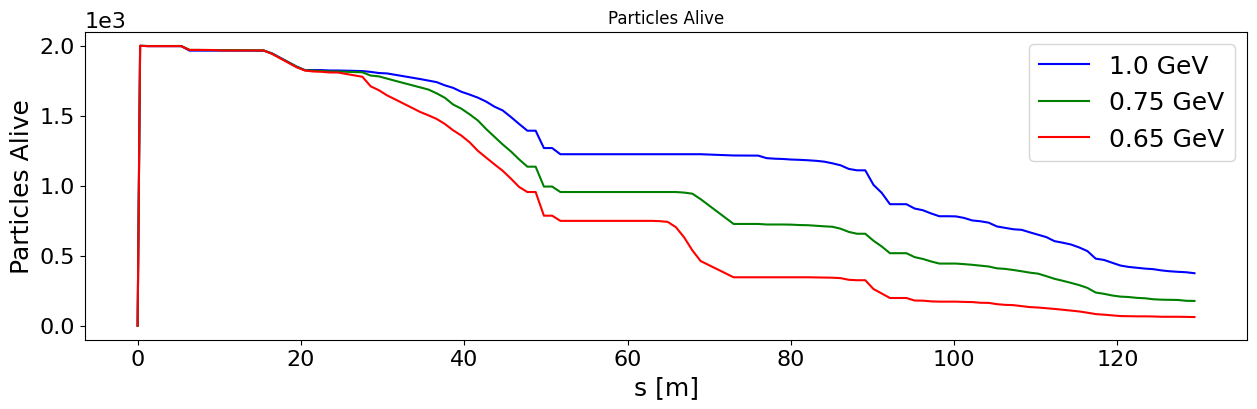

In [13]:
fig, ax = plt.subplots(figsize=(15,4))

colors = ['b', 'g', 'r']  # Define a list of colors



for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]
    ax.plot(df_sub.s, df_sub.particles_alive, color=color, label=f'{energy} GeV')

ax.set_xlabel('s [m]')
ax.set_ylabel('Particles Alive')
ax.set_title('Particles Alive')
ax.legend()


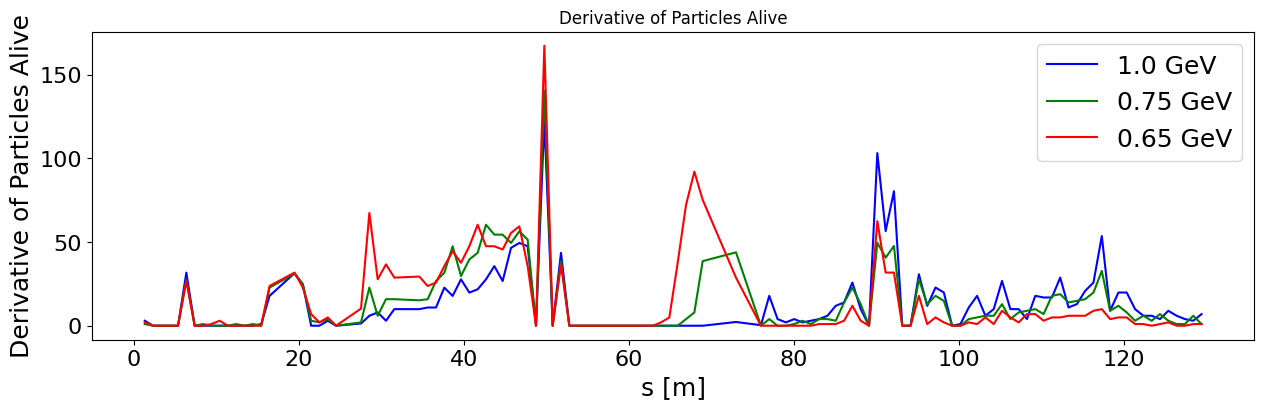

In [14]:
fig, ax = plt.subplots(figsize=(15,4))

colors = ['b', 'g', 'r']  # Define a list of colors

threshold = 1000  # Set a threshold to control the maximum absolute value for the derivative

for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]
    
    # Compute the derivative of 'particles_alive'
    derivative = -df_sub.particles_alive.diff() / df_sub.s.diff()

    # Add a condition to remove the huge jumps
    mask = derivative.abs() < threshold
    
    ax.plot(df_sub.s[mask], derivative[mask], color=color, label=f'{energy} GeV')

ax.set_xlabel('s [m]')
ax.set_ylabel('Derivative of Particles Alive')
ax.set_title('Derivative of Particles Alive')
ax.legend()


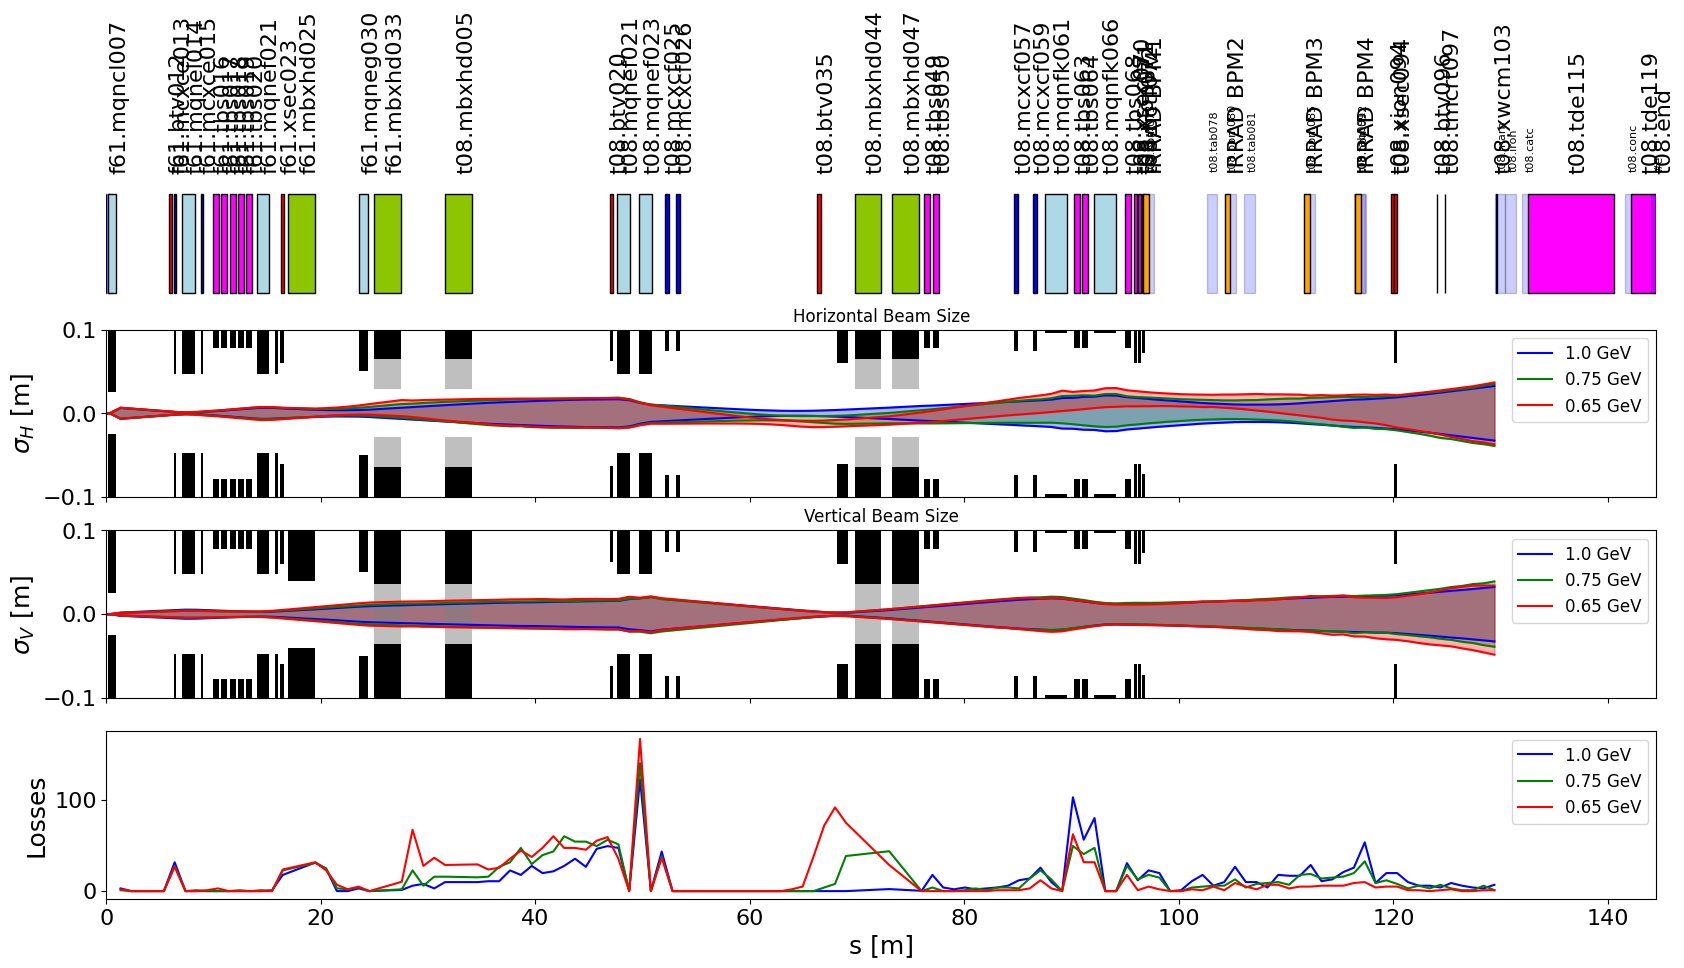

In [38]:
fig, ax = plt.subplots(4, 1, figsize=(20,10), sharex=True)  # Create a figure with two subplots
center_energy = 1.0
fig.suptitle(f'Centered on {center_energy} GeV', fontsize=16)  # Set the figure title
draw_synoptic(ax[0], twiss)

colors = ['b', 'g', 'r']  # Define a list of colors

ref_H = df[df.energy_GeV == center_energy].mean_H  # Reference beam size
ref_V = df[df.energy_GeV == center_energy].mean_V  # Reference beam size

for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]

    ax[1].plot(df_sub.s, df_sub.mean_H - ref_H + df_sub.std_H, color=color, label=f'{energy} GeV')
    ax[1].plot(df_sub.s, df_sub.mean_H - ref_H - df_sub.std_H, color=color)

    # Fill the space between the standard deviation lines
    ax[1].fill_between(df_sub.s, df_sub.mean_H - ref_H - df_sub.std_H, df_sub.mean_H - ref_H + df_sub.std_H, color=color, alpha=0.3)

    ax[2].plot(df_sub.s, df_sub.mean_V - ref_V + df_sub.std_V, color=color, label=f'{energy} GeV')
    ax[2].plot(df_sub.s, df_sub.mean_V - ref_V - df_sub.std_V, color=color)

    # Fill the space between the standard deviation lines
    ax[2].fill_between(df_sub.s, df_sub.mean_V - ref_V - df_sub.std_V, df_sub.mean_V - ref_V + df_sub.std_V, color=color, alpha=0.3)

ax[1].set_ylabel('$\sigma_{H}$ [m]')
ax[1].set_title('Horizontal Beam Size')
ax[1].legend(loc = 'upper right')

ax[2].set_ylabel('$\sigma_{V}$ [m]')
ax[2].set_title('Vertical Beam Size')
ax[2].legend(loc = 'upper right')

draw_aperture_circle(ax[1], twiss, "aper_1")
draw_aperture_circle(ax[2], twiss, "aper_1")
draw_aperture_rectangle(ax[1], twiss, "aper_1")
draw_aperture_rectangle(ax[2], twiss, "aper_2")
draw_aperture_racetrackH(ax[1], twiss, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss, "aper_1", "aper_2", "aper_3", "aper_4")

ax[1].set_ylim(-0.1, 0.1)
ax[2].set_ylim(-0.1, 0.1)

threshold = 1000  # Set a threshold to control the maximum absolute value for the derivative

for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]
    
    # Compute the derivative of 'particles_alive'
    derivative = -df_sub.particles_alive.diff() / df_sub.s.diff()

    # Add a condition to remove the huge jumps
    mask = derivative.abs() < threshold
    
    ax[3].plot(df_sub.s[mask], derivative[mask], color=color, label=f'{energy} GeV')

ax[3].set_xlabel('s [m]')
ax[3].set_ylabel('Losses')
ax[3].legend(loc = "upper right")

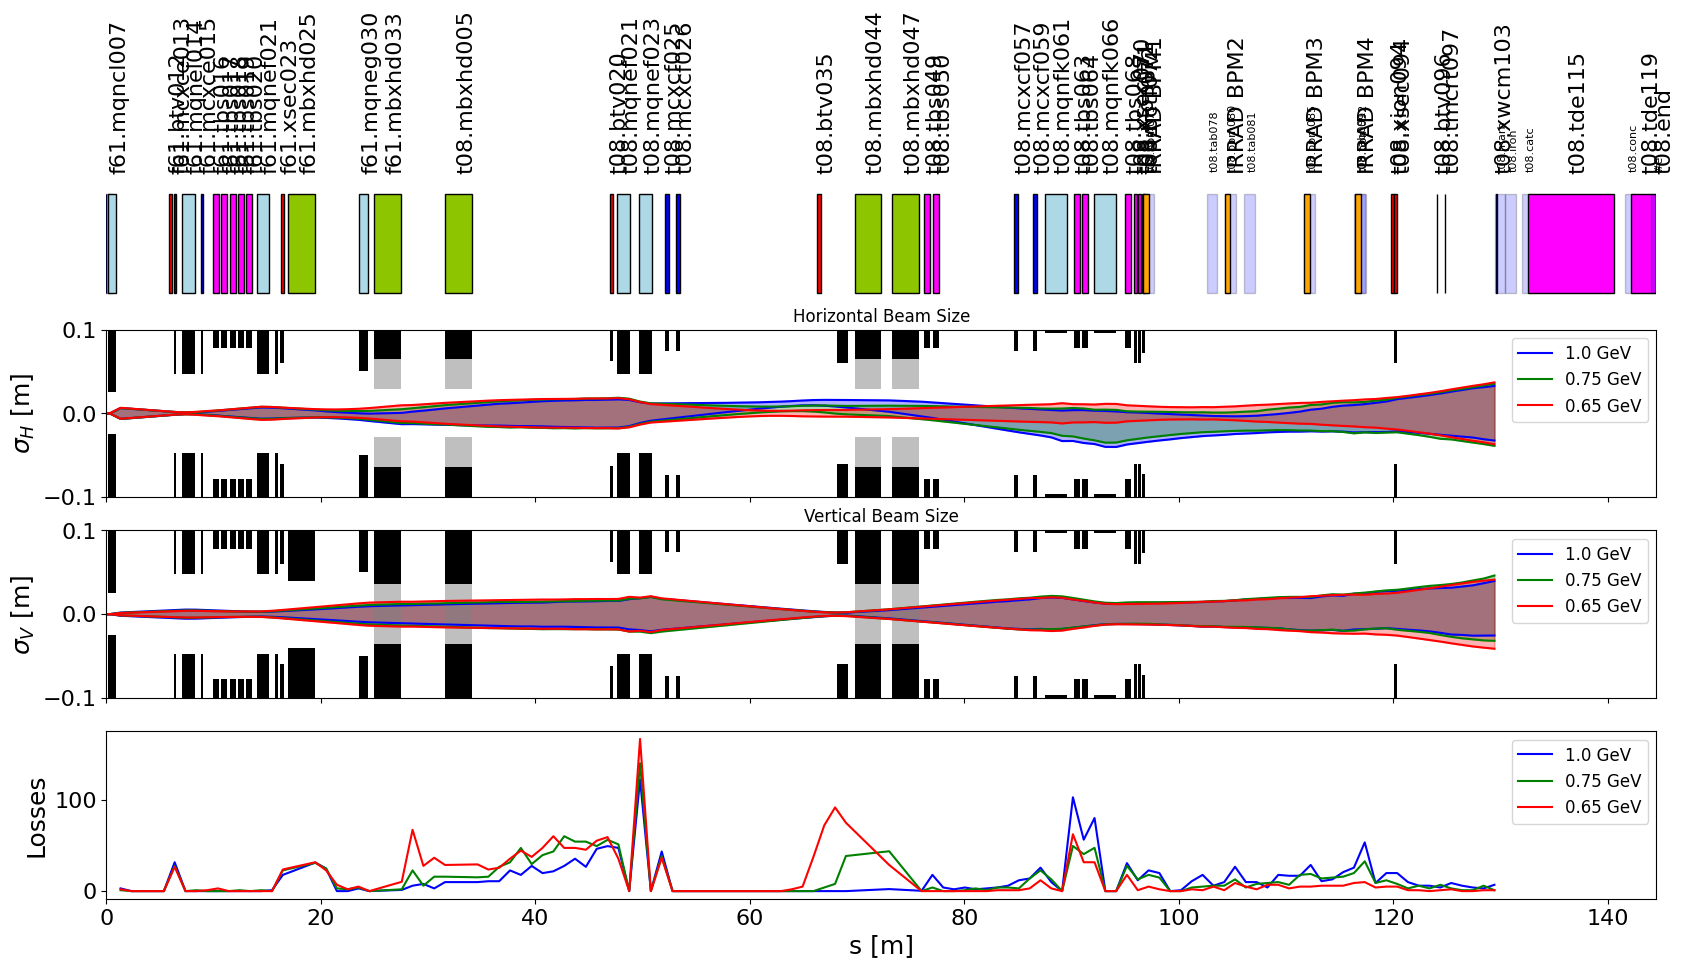

In [40]:
fig, ax = plt.subplots(4, 1, figsize=(20,10), sharex=True)  # Create a figure with two subplots

draw_synoptic(ax[0], twiss)

colors = ['b', 'g', 'r']  # Define a list of colors

ref_H = df[df.energy_GeV == 0.65].mean_H  # Reference beam size
ref_V = df[df.energy_GeV == 0.65].mean_V  # Reference beam size

for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]

    ax[1].plot(df_sub.s, df_sub.mean_H - ref_H + df_sub.std_H, color=color, label=f'{energy} GeV')
    ax[1].plot(df_sub.s, df_sub.mean_H - ref_H - df_sub.std_H, color=color)

    # Fill the space between the standard deviation lines
    ax[1].fill_between(df_sub.s, df_sub.mean_H - ref_H - df_sub.std_H, df_sub.mean_H - ref_H + df_sub.std_H, color=color, alpha=0.3)

    ax[2].plot(df_sub.s, df_sub.mean_V - ref_V + df_sub.std_V, color=color, label=f'{energy} GeV')
    ax[2].plot(df_sub.s, df_sub.mean_V - ref_V - df_sub.std_V, color=color)

    # Fill the space between the standard deviation lines
    ax[2].fill_between(df_sub.s, df_sub.mean_V - ref_V - df_sub.std_V, df_sub.mean_V - ref_V + df_sub.std_V, color=color, alpha=0.3)

ax[1].set_ylabel('$\sigma_{H}$ [m]')
ax[1].set_title('Horizontal Beam Size')
ax[1].legend(loc = 'upper right')

ax[2].set_ylabel('$\sigma_{V}$ [m]')
ax[2].set_title('Vertical Beam Size')
ax[2].legend(loc = 'upper right')

draw_aperture_circle(ax[1], twiss, "aper_1")
draw_aperture_circle(ax[2], twiss, "aper_1")
draw_aperture_rectangle(ax[1], twiss, "aper_1")
draw_aperture_rectangle(ax[2], twiss, "aper_2")
draw_aperture_racetrackH(ax[1], twiss, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss, "aper_1", "aper_2", "aper_3", "aper_4")

ax[1].set_ylim(-0.1, 0.1)
ax[2].set_ylim(-0.1, 0.1)

threshold = 1000  # Set a threshold to control the maximum absolute value for the derivative

for energy, color in zip(df.energy_GeV.unique(), colors):  # Loop over both energy and color

    df_sub = df[df.energy_GeV == energy]
    
    # Compute the derivative of 'particles_alive'
    derivative = -df_sub.particles_alive.diff() / df_sub.s.diff()

    # Add a condition to remove the huge jumps
    mask = derivative.abs() < threshold
    
    ax[3].plot(df_sub.s[mask], derivative[mask], color=color, label=f'{energy} GeV')

ax[3].set_xlabel('s [m]')
ax[3].set_ylabel('Losses')
ax[3].legend(loc = "upper right")